In [34]:
# Импортируем библиотеки, которые понадобятся нам для работы
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

 ## 1. Загрузка временного ряда и приведение к типу datetime.

In [4]:
# Загрузим файл csv в датафрейм
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [5]:
# Выведем первые строки датафрейма для ознакомления
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [6]:
# Выведем последние строки датафрейма для ознакомления
df.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,NaN,NaN,Zimbabwe


In [7]:
# Выведем информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [9]:
# Приведем столбец с датой в формат datetime
df['dt'] = pd.to_datetime(df['dt'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  datetime64[ns]
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 17.6+ MB


## 2. Проверка на наличие пропущенных значений.

In [10]:
# Выведем количество пропущенных строк в датафрейме в абсолютных значениях
df.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [11]:
# Подсчитаем процент строк с пропусками (количество пропусков в относительных значениях)
df.isna().sum() / len(df) * 100

dt                               0.000000
AverageTemperature               5.654225
AverageTemperatureUncertainty    5.526251
Country                          0.000000
dtype: float64

В нашем датасете примерно 6% пропусков в столбцах `AverageTemperature` и `AverageTemperatureUncertainty`, означающих среднюю температуру и погрешность в измерении средней температуры соответственно.

 ## 3. Обработка пропущенных значений (линейная интерполяция, заполнение средним за период, заполнение предыдущим/следующим значением). Обосновать выбор метода.

In [12]:
# сделаем копию нашего датафрейма, чтобы применить интерполяцию без потери исходных данных
df_new = df.copy()

In [13]:
# выполним линейную интерполяцию стобцов с пропусками
df_new['AverageTemperature'] = df_new['AverageTemperature'].interpolate()
df_new['AverageTemperatureUncertainty'] = df_new['AverageTemperatureUncertainty'].interpolate()

In [15]:
# Снова выведем количество пропущенных строк в датафрейме в абсолютных значениях
df_new.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [19]:
# Выведем первые и последние строки, проверим заполнение пропусков
df_new.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.3840,2.2940,Åland
1,1743-12-01,3.8132,2.7712,Åland
2,1744-01-01,3.2424,3.2484,Åland
3,1744-02-01,2.6716,3.7256,Åland
4,1744-03-01,2.1008,4.2028,Åland


In [18]:
df_new.tail()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
577457,2013-05-01,19.059,1.022,Zimbabwe
577458,2013-06-01,17.613,0.473,Zimbabwe
577459,2013-07-01,17.000,0.453,Zimbabwe
577460,2013-08-01,19.759,0.717,Zimbabwe
577461,2013-09-01,19.759,0.717,Zimbabwe


Мы выбрали линейную интерполяцию для заполнения пропусков, так как пропусков в данных было немного (около 6%), данные имеют формат временного ряда, и линейная интерполяция поможет сохранить тенденции и динамику изменения температур во времени.

## 4. Выявление выбросов (визуализация, Z-score).

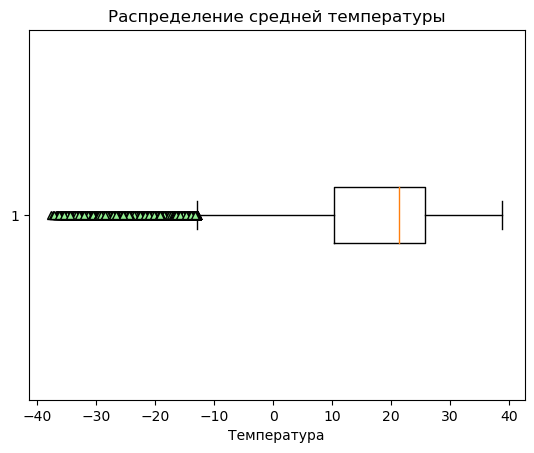

In [29]:
# построим ящики с усами для определения выбросов
plt.boxplot(df_new['AverageTemperature'], vert=False, flierprops=dict(markerfacecolor='lightgreen', marker='^'))
plt.title('Распределение средней температуры')
plt.xlabel('Температура')
plt.show()

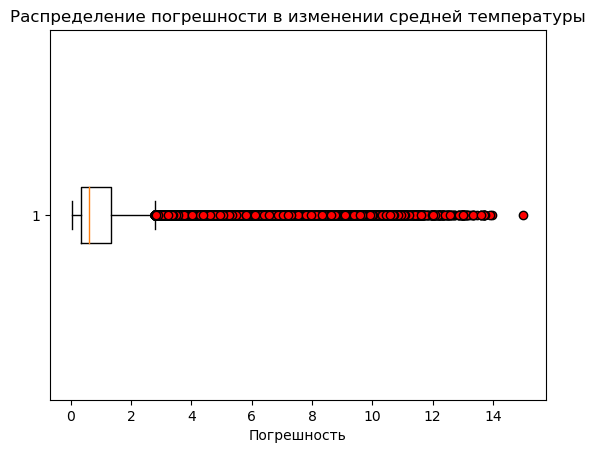

In [33]:
plt.boxplot(df_new['AverageTemperatureUncertainty'], vert=False, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Распределение погрешности в изменении средней температуры')
plt.xlabel('Погрешность')
plt.show()

In [42]:
# Расчитаем Z-score для каждого значения в наших столбцах
df_new['Temperature_Z'] = np.abs(stats.zscore(df_new['AverageTemperature']))
df_new['Uncertainty_Z'] = np.abs(stats.zscore(df_new['AverageTemperatureUncertainty']))

In [41]:
# Установим парог и выявим выбросы, выведем информацию о строках с выбросами
threshold = 3
temperature_outliers = df_new[df_new['Temperature_Z'] > threshold]
uncertainty_outliers = df_new[df_new['Uncertainty_Z'] > threshold]

In [39]:
temperature_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5712 entries, 55431 to 518507
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             5712 non-null   datetime64[ns]
 1   AverageTemperature             5712 non-null   float64       
 2   AverageTemperatureUncertainty  5712 non-null   float64       
 3   Country                        5712 non-null   object        
 4   Temperature_Z                  5712 non-null   float64       
 5   Uncertainty_Z                  5712 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 312.4+ KB


In [40]:
uncertainty_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12664 entries, 5 to 569544
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             12664 non-null  datetime64[ns]
 1   AverageTemperature             12664 non-null  float64       
 2   AverageTemperatureUncertainty  12664 non-null  float64       
 3   Country                        12664 non-null  object        
 4   Temperature_Z                  12664 non-null  float64       
 5   Uncertainty_Z                  12664 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 692.6+ KB


## 5. Обработка выбросов (замена на граничные значения, сглаживание скользящим средним). Обосновать выбор метода.

In [43]:
# Используем сглаживание скользящим средним для отработки выбросов
df_new['AverageTemperature_Smoothed'] = df_new['AverageTemperature'].rolling(window=5, center=True).mean()
df_new['AverageTemperatureUncertainty_Smoothed'] = df_new['AverageTemperatureUncertainty'].rolling(window=5, center=True).mean()

Мы использовали сглаживание скользящим средним для отработки выбросов с целью обнаружения и анализа долгосрочных трендов, так как выбросы в нашем временном ряде обусловлены сезонными колебаниями и различным расположением стран.

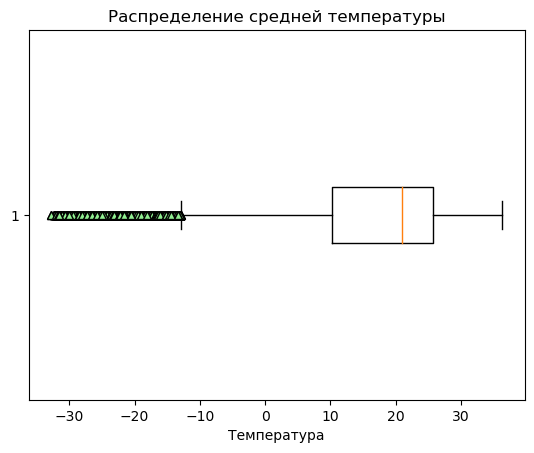

In [49]:
# построим ящики с усами для определения выбросов
plt.boxplot(df_new['AverageTemperature_Smoothed'].dropna(), vert=False, flierprops=dict(markerfacecolor='lightgreen', marker='^'))
plt.title('Распределение средней температуры')
plt.xlabel('Температура')
plt.show()

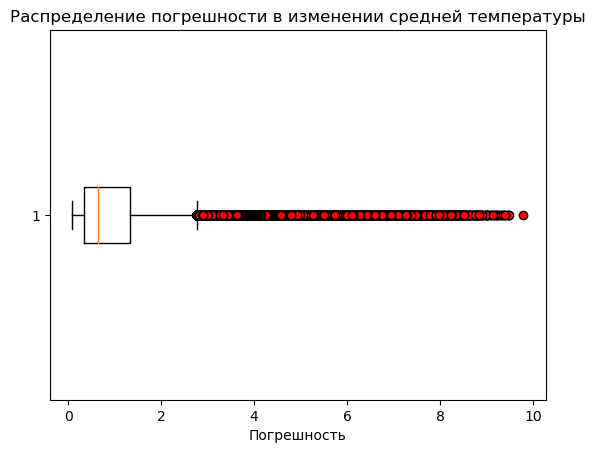

In [50]:
# построим ящики с усами для определения выбросов
plt.boxplot(df_new['AverageTemperatureUncertainty_Smoothed'].dropna(), vert=False, flierprops=dict(markerfacecolor='red', marker='o'))
plt.title('Распределение погрешности в изменении средней температуры')
plt.xlabel('Погрешность')
plt.show()

## 6. Визуализация временного ряда после предобработки.

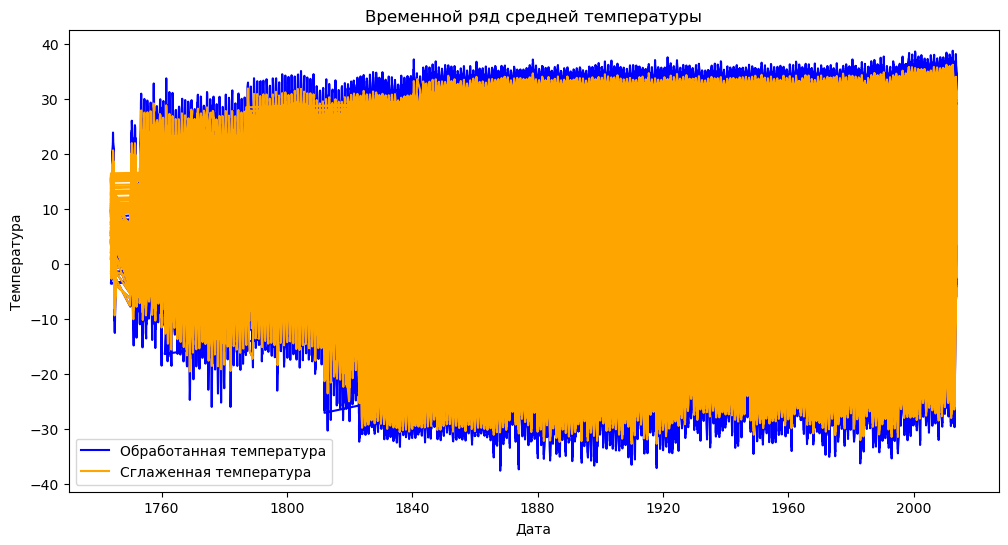

In [54]:
# Визуализация среднего значения температуры
plt.figure(figsize=(12, 6))
plt.plot(df_new['dt'], df_new['AverageTemperature'], label='Обработанная температура', color='blue')
plt.plot(df_new['dt'], df_new['AverageTemperature_Smoothed'], label='Сглаженная температура', color='orange')

plt.title('Временной ряд средней температуры')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.legend()
plt.show()

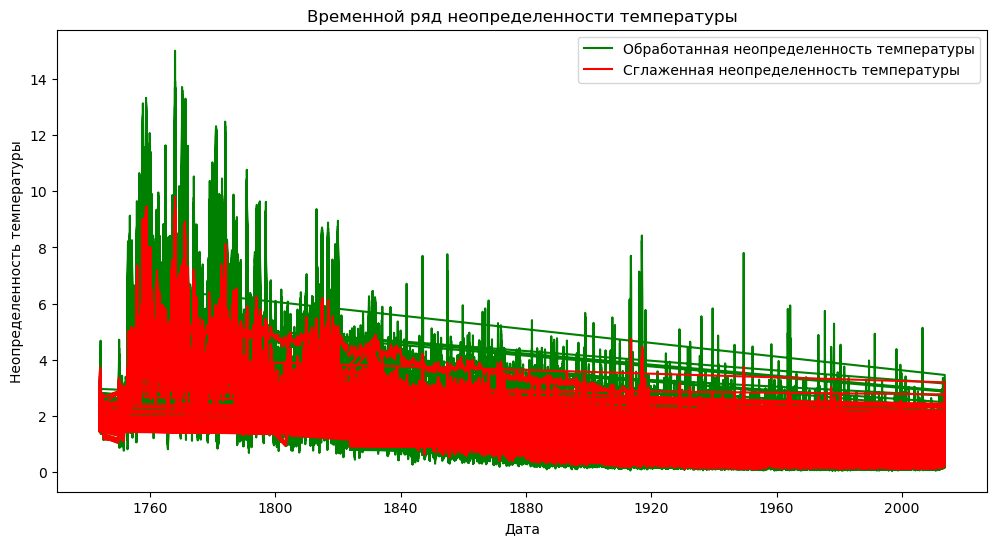

In [56]:
# Визуализация неопределенности температуры
plt.figure(figsize=(12, 6))

plt.plot(df_new['dt'], df_new['AverageTemperatureUncertainty'], label='Обработанная неопределенность температуры', color='green')
plt.plot(df_new['dt'], df_new['AverageTemperatureUncertainty_Smoothed'], label='Сглаженная неопределенность температуры', color='red')

plt.title('Временной ряд неопределенности температуры')
plt.xlabel('Дата')
plt.ylabel('Неопределенность температуры')
plt.legend()
plt.show()